In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


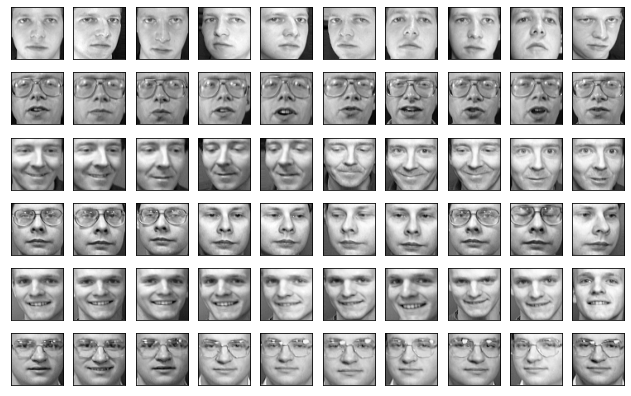

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

##Based Functions
def show_original_images(pixels):
  fig, axes = plt.subplots(6, 10, figsize=(11,7), subplot_kw={'xticks':[], 'yticks':[]})
  for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
  plt.show()

def show_eigenvectors(pca):
  fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]})
  for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    ax.set_title("PC " + str(i+1))
  plt.show()

## STEP 1 : To import dataset and visualise using helper fucntion

path="/content/drive/MyDrive/CSV/face_data.csv"
df = pd.read_csv(path)
targets = df["target"]
pixels = df.drop(["target"],axis=1)

##print np.array(pixels).show
show_original_images(pixels)



In [ ]:
## STEP 2 : Dataset Splitting
x_train, x_test, y_train, y_test = train_test_split(pixels,targets)


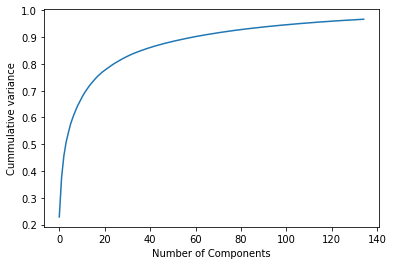

In [ ]:
## STEP 3 : Implement PCA
pca = PCA(n_components=135).fit(x_train) ## Components(features) changed from 250 to 130 for maximum variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

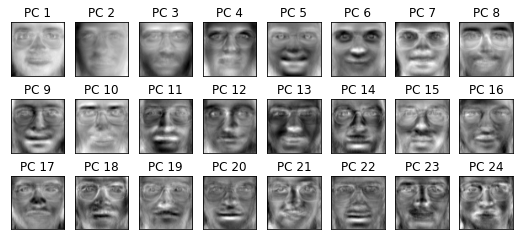

In [ ]:
## Showing the Directions of maximum variance (White = High Variance)
show_eigenvectors(pca) 

In [ ]:
## STEP 4 : Project Training data
print("Transforming Train data into PCA data")
x_train_pca = pca.transform(x_train)

Transforming Train data into PCA data


In [ ]:
## STEP 5 : Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=500,gamma=0.001)
clf = clf.fit(x_train_pca, y_train)

In [ ]:
## Testing and Classification Report section
print("Predicting People types(names) in the test dataset")
x_test_pca = pca.transform(x_test)
t0=time()
y_pred = clf.predict(x_test_pca)
print("Completed in %0.2f"%(time()-t0))
print(classification_report(y_test,y_pred))

Predicting People types(names) in the test dataset
Completed in 0.01
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         2
          17

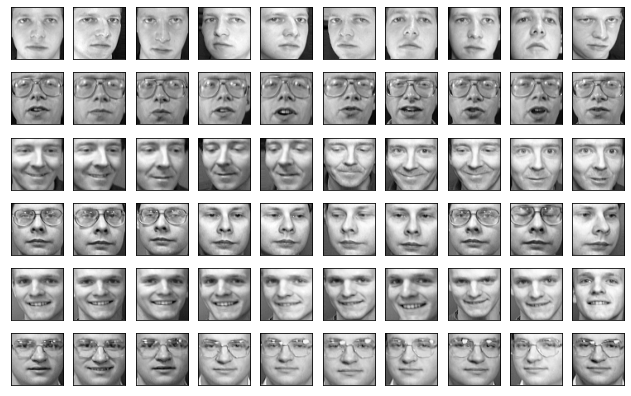

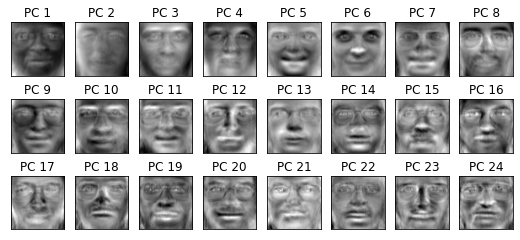

In [ ]:
show_original_images(pixels)
show_eigenvectors(pca)